## Q.) The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.
## (a) Find the best linear relationship between year and price. 
## (b) Can you predict the possible price of a 2022 model second-hand grand i10?
## (c) Please learn about lasso regression and create a model along with linear regression. 
## (c) Find out which one is performing better.
*********

In [287]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [288]:
# loading the dataset into the python environment
data = pd.read_csv('C:/Users/Lenovo/Assignment/assignment 6/DATA/car_age_price.csv')

In [289]:
# display the first 5 rows of the dataframe
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### CHECKING FOR NULL VALUES

In [290]:
# Print information about the dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [291]:
# number of null values in the dataframe 'data'
data.isna().sum()

Year     0
Price    0
dtype: int64

~ From the above display, there are no null values

In [292]:
# number of rows and columns of the dataframe 'data'
data.shape

(112, 2)

~It is having 112 rows and 2 columns

In [293]:
# display the summary statistics of  numerical columns
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


### CHECKING FOR DUPLICATES

In [294]:
# check whether rows in the DataFrame are duplicated or not
data.duplicated()

0      False
1      False
2      False
3       True
4       True
       ...  
107    False
108    False
109    False
110    False
111     True
Length: 112, dtype: bool

~ From the above display, there are some rows that are having duplicate values

In [295]:
# display the rows having duplicates 
data[data.duplicated()]

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [296]:
# remove duplicates and store it in a new dataframe
data1 = data.drop_duplicates(ignore_index=True)

In [297]:
# display the first 5 rows of the dataframe after removing the duplicates
data1.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2015,350000
4,2016,425000


In [298]:
# number of rows and columns of the dataframe 'data1' after removing the duplicates
data1.shape

(58, 2)

~It is having 58 rows and 2 columns

### CHECKING FOR OUTLIERS
~ we can check for outliers in columns 'Year', 'Price'

#### Outliers in 'Year' column

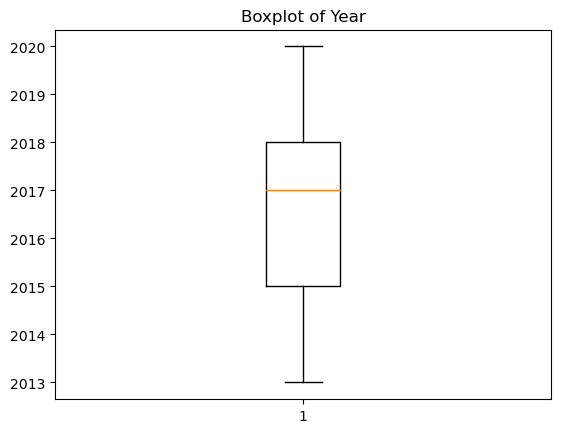

In [299]:
# Boxplot of 'Year' column to check outliers
plt.boxplot(data1['Year'])

# plotting the title as "Boxplot of Year"
plt.title("Boxplot of Year")

# display figures
plt.show()

~ From the above display, no outliers present in 'Year' column

#### Outliers in 'Price' column

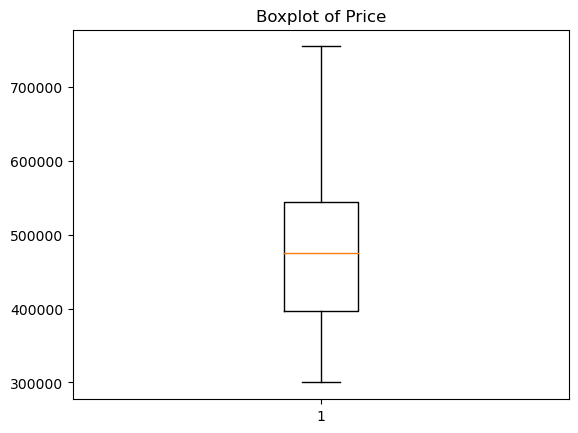

In [300]:
# Boxplot of 'Price' column to check outliers
plt.boxplot(data1['Price'])

# plotting the title as "Boxplot of Price"
plt.title("Boxplot of Price")

# display figures
plt.show()

~ From the above display, no outliers present in 'Price' column

### CORRELATION

In [301]:
# creating an instance for correlation
corrmatrix = data1.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,Year,Price
Year,1.000000,0.807276
Price,0.807276,1.000000


~ From the above display, 'Price' column is having a good positive correlation with 'Year' column.

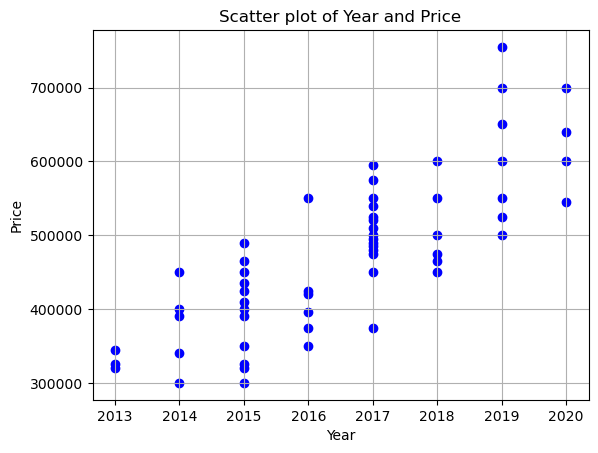

In [302]:
# sactter plot of 'Year' and 'Price' with color as blue
plt.scatter(data1['Year'], data1['Price'], color = 'blue') 

# display title as 'Scatter plot of Year and Price'
plt.title('Scatter plot of Year and Price')

# display label on x-axis as 'Year'
plt.xlabel('Year')

# display label on y-axis as 'Price'
plt.ylabel('Price')

# display grid
plt.grid()

### SCALING
~ It is done only for features. In this problem we have only one feature or predictor - 'Year' column. Hence no need to perform scaling 

### (a) BEST LINEAR RELATIONSHIP BETWEEN YEAR & PRICE
~ 'Price' column is the target variable

~ 'Year' column is the predictor variable

### SPLIT THE DATA INTO FEATURES AND TARGET

In [303]:
# define target variable
y = data1.drop(['Year'], axis = 1) 

# define predictor variables
X = data1.drop(['Price'], axis = 1)

#add constant to predictor variables
X1 = sm.add_constant(X)

# display the values of X1
X1 # returns the original values with a constant (column of ones) as the first or last column. 

,const,Year
0,1.0,2018
1,1.0,2019
2,1.0,2019
3,1.0,2015
4,1.0,2016
5,1.0,2017
6,1.0,2017
7,1.0,2019
8,1.0,2018
9,1.0,2017


In [304]:
# using Ordinary Least Squares for estimating coefficients of linear regression equations 
model = sm.OLS(y, X1).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           1.95e-14
Time:                        17:18:24   Log-Likelihood:                -722.34
No. Observations:                  58   AIC:                             1449.
Df Residuals:                      56   BIC:                             1453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.024e+07   8.86e+06    -10.183      0.0

~ From the above results,
* R-squared: 0.652. This is known as the coefficient of determination. It is the proportion of the variance in the target variable that can be explained by the predictor variables. In this example, 65.2% of the variation in the price can be explained by the year of making.

* Estimated regression equation: We can use the coefficients from the output of the model to create the following estimated regression equation: 

price = -9.024e+07 +  4.499e+04 * (Year) 

~ The best linear relationship between year and price:

price = -9.024e+07 +  4.499e+04 * (Year)
    

### (b) POSSIBLE PRICE OF A 2022 MODEL SECOND-HAND GRAND i10

In [305]:
# predicting the possible price of a 2022 model second-hand grand i10

# assign 2022 to 'Year' variable
Year = 2022

# estimated regression equation
price = -9.024e+07 +  4.499e+04 * (Year)

# display the 'price'  for 2022 model second-hand grand i10
f"Possible price of a 2022 model second-hand grand i10 = {price}"

'Possible price of a 2022 model second-hand grand i10 = 729780.0'

### SPLIT FEATURES AND TARGET INTO TRAINING & TESTING DATASET

In [306]:
# displaying features
X.head()

,Year
0,2018
1,2019
2,2019
3,2015
4,2016


In [307]:
# displaying target
y.head()

,Price
0,465000
1,755000
2,700000
3,350000
4,425000


In [308]:
# X and y is further split into 4 variables X_train, X_test, y_train, y_test for Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [309]:
# displaying training data of features
X_train

,Year
36,2015
31,2015
8,2018
17,2018
6,2017
4,2016
41,2015
19,2019
30,2016
49,2020


In [310]:
# displaying testing data of features
X_test

,Year
0,2018
5,2017
34,2017
13,2015
44,2014
52,2017
37,2015
25,2013
46,2015
12,2017


In [311]:
# displaying training data of target
y_train

,Price
36,465000
31,490000
8,500000
17,475000
6,509999
4,425000
41,325000
19,525000
30,550000
49,700000


In [312]:
# displaying testing data of target
y_test

,Price
0,465000
5,575000
34,495000
13,434999
44,390000
52,375000
37,300000
25,325000
46,320000
12,550000


### (c) CREATING LINEAR & LASSO REGRESSION MODELS

### CREATING THE LINEAR REGRESSION MODEL

In [313]:
# creating an instance of LinearRegression() 
lr = LinearRegression() 

In [314]:
# Fits data into the model, creating the model using training data
model_1 = lr.fit(X_train, y_train)

In [315]:
# predict values of target of test data by giving predictor values of test data to the trained model
y_pred_linear = model_1.predict(X_test)

In [316]:
# display predicted values of target of test data
y_pred_linear

array([[541975.77419354],
       [498094.31397849],
       [498094.31397849],
       [410331.39354838],
       [366449.93333334],
       [498094.31397849],
       [410331.39354838],
       [322568.47311828],
       [410331.39354838],
       [498094.31397849],
       [629738.69462365],
       [410331.39354838]])

In [317]:
# display actual values of target of test data
y_test

,Price
0,465000
5,575000
34,495000
13,434999
44,390000
52,375000
37,300000
25,325000
46,320000
12,550000


### CREATING THE LASSO REGRESSION MODEL

In [318]:
# create and fit LASSO models

# create an instance for Lasso()
lasso = Lasso(alpha=1)

# Fits data into the model, creating the model using training data
model_2 = lasso.fit(X_train, y_train)

In [319]:
# predict values of target of test data by giving predictor values of test data to the trained model
y_pred_lasso = model_2.predict(X_test)

In [320]:
# display predicted values of target of test data
y_pred_lasso 

array([541975.40322579, 498094.22741935, 498094.22741935, 410331.87580645,
       366450.69999999, 498094.22741935, 410331.87580645, 322569.52419354,
       410331.87580645, 498094.22741935, 629737.75483871, 410331.87580645])

In [321]:
# display actual values of target of test data
y_test

,Price
0,465000
5,575000
34,495000
13,434999
44,390000
52,375000
37,300000
25,325000
46,320000
12,550000


### (d) WHICH ONE PERFORMING BETTER

### EVALUATION METRICS 
~ There are no outliers in the dataset, going for R squared value

##### EVALUATION METRICS FOR LINEAR REGRESSION MODEL

In [322]:
# displaying R squared value for Linear Regression Model
print('R squared value for Linear Regression Model is: ', r2_score (y_test, y_pred_linear))

R squared value for Linear Regression Model is:  0.5952655854274035


##### EVALUATION METRICS FOR LASSO REGRESSION MODEL

In [323]:
# displaying R squared value for Lasso Regression Model
print('R squared value for Lasso Regression Model is: ', r2_score (y_test, y_pred_lasso))

R squared value for Lasso Regression Model is:  0.5952644852229334


~  R squared value should be close to one for better results

~ From the above R squared values of Linear Regression Model and Lasso Regression Model, Linear Regression Model is performing better since its R squared value is more closer to one when compared to  R squared value of Lasso Regression Model.